In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r'C:\Users\Intern13\Desktop\project\qtm\dataset\wether\train.csv')

# Display the first few rows and basic information about the dataset
print("Before cleaning:")
print(data.head())
print(data.info())
print(data.isnull().sum())

# Fill null values and empty spaces with 0
data = data.replace(['', ' ', np.nan], 0)

# Convert all columns (except 'time') to numeric type, filling errors with 0
for col in data.columns:
    if col != 'time':
        data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0)

# Display the data after cleaning
print("\nAfter cleaning:")
print(data.head())
print(data.info())
print(data.isnull().sum())

# Convert 'time' column to datetime, specifying the correct format
data['time'] = pd.to_datetime(data['time'], format='%d-%m-%Y')

# Extract additional time-based features
data['day_of_year'] = data['time'].dt.dayofyear
data['month'] = data['time'].dt.month

# Prepare features (X) and target variable (y)
X = data[['tmin', 'tmax', 'prcp', 'day_of_year', 'month']]
y = data['tavg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


Before cleaning:
         time  tavg  tmin  tmax  prcp
0  01-01-1990  23.2  17.0   NaN   0.0
1  02-01-1990  22.2  16.5  29.9   0.0
2  03-01-1990  21.8  16.3  30.7   0.0
3  04-01-1990  25.4  17.9  31.8   0.0
4  05-01-1990  26.5  19.3  33.7   0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10731 entries, 0 to 10730
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    10731 non-null  object 
 1   tavg    10720 non-null  float64
 2   tmin    8277 non-null   float64
 3   tmax    8824 non-null   float64
 4   prcp    6383 non-null   float64
dtypes: float64(4), object(1)
memory usage: 419.3+ KB
None
time       0
tavg      11
tmin    2454
tmax    1907
prcp    4348
dtype: int64

After cleaning:
         time  tavg  tmin  tmax  prcp
0  01-01-1990  23.2  17.0   0.0   0.0
1  02-01-1990  22.2  16.5  29.9   0.0
2  03-01-1990  21.8  16.3  30.7   0.0
3  04-01-1990  25.4  17.9  31.8   0.0
4  05-01-1990  26.5  19.3  33.7   0.0
<class

RandomForestRegressor(random_state=42)

Mean Squared Error: 2.1160830328402715
R-squared Score: 0.6520567958596863


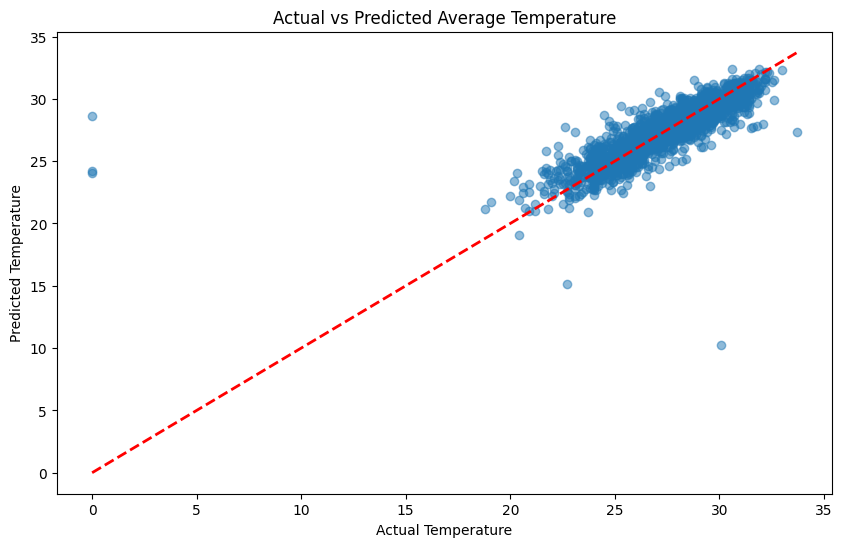

       feature  importance
3  day_of_year    0.566596
1         tmax    0.238277
0         tmin    0.156397
2         prcp    0.019812
4        month    0.018919


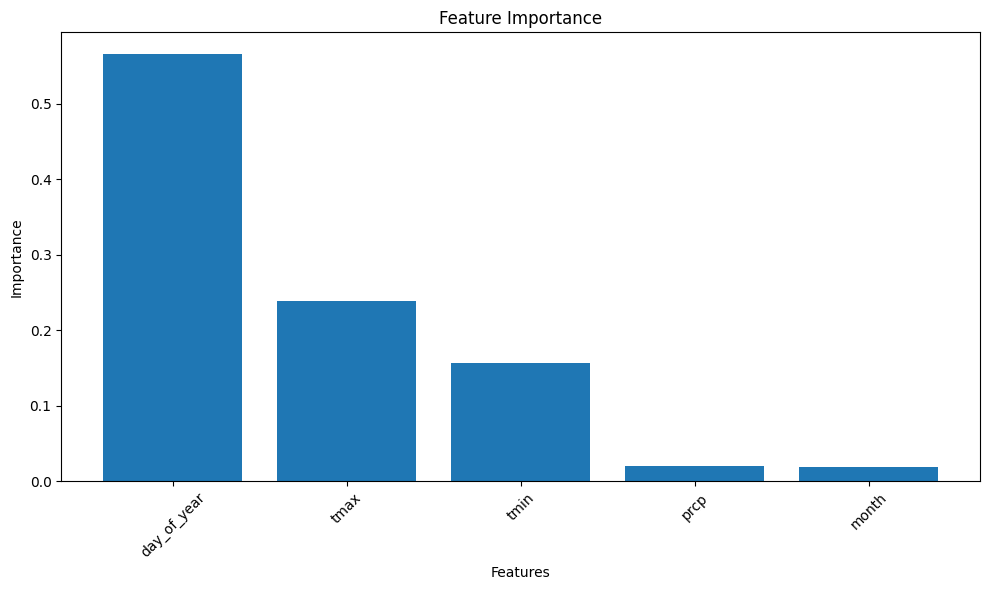

In [5]:

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Average Temperature")
plt.show()

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()